## PROBLEM STATEMENT:-IDENTIFYING FAKE JOB LISTINGS: BUILD A CLASSIFICATION MODEL TO DETERMINE THE LEGITIMACY OF JOB POSTINGS
 ***

In [ ]:
#Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
job = pd.read_csv(r"/content/job_train.csv")
job

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
0,Architect (Middleware - MQ) - Kuwait,"KW, KU,","On behalf of our client, a well known multinat...",-Working technical knowledge of IT systems and...,0,1,0,0
1,Interviewing Now for Sales Rep Positions -- wi...,"US, TX, Corpus Christi","We are Argenta Field Solutions, a rapidly expa...",#NAME?,0,1,0,0
2,Process Controls Staff Engineer - Foxboro I/A ...,"US, TX, USA Southwest",Experienced Process Controls Staff Engineer is...,At least 10 years of degreed professional expe...,0,0,0,0
3,Experienced Telemarketer Wanted - Digital Solu...,"AU, NSW,",If you have a passion for people and love to s...,"Responsibilities - Prospecting, following up a...",0,1,0,0
4,Senior Network Engineer,"GB, ENG, London",As the successful Senior Network Engineer you ...,Essential skills:•Juniper switching/routing/se...,0,1,0,0
...,...,...,...,...,...,...,...,...
8935,Financial Analyst,"GR, I, Paiania","Financial analysis, reporting and review of de...",Postgraduate degree required. Economics or Fin...,0,1,1,0
8936,Customer Service Associate - Part Time,"CA, ON, Peterborough",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,0,1,0,0
8937,Sales Manager,"UA, 61, Ternopil","Responsibilitiesactive sales, realization of c...",Main requirementsexperience with Sales (2+ yea...,0,0,1,0
8938,Administrative Assistant,"US, CA, Santa Ana",In addition to clerical and administrative du...,NaN,0,0,0,1


##  DATA CLEANING

In [ ]:
job.isnull().sum()

,0
title,0
location,157
description,1
requirements,1326
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [ ]:
for i in job.columns:
    print(i,":","\n",sum(job[i].isnull()),"\n")

title : 
 0 

location : 
 157 

description : 
 1 

requirements : 
 1326 

telecommuting : 
 0 

has_company_logo : 
 0 

has_questions : 
 0 

fraudulent : 
 0 



In [ ]:
for i in job.columns:
    print(i,":","\n",sum(job[i]=='NaN'))

title : 
 0
location : 
 0
description : 
 0
requirements : 
 0
telecommuting : 
 0
has_company_logo : 
 0
has_questions : 
 0
fraudulent : 
 0


In [ ]:
job.dtypes

,0
title,object
location,object
description,object
requirements,object
telecommuting,int64
has_company_logo,int64
has_questions,int64
fraudulent,int64


In [ ]:
d = job.describe(include="all")
d

,title,location,description,requirements,telecommuting,has_company_logo,has_questions,fraudulent
count,8940,8783,8939,7614,8940.000000,8940.000000,8940.000000,8940.000000
unique,6132,2131,7767,6327,NaN,NaN,NaN,NaN
top,English Teacher Abroad,"GB, LND, London","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,NaN,NaN,NaN,NaN
freq,152,367,187,200,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.043736,0.794407,0.487248,0.051007
std,NaN,NaN,NaN,NaN,0.204519,0.404157,0.499865,0.220024
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000


In [ ]:
job.requirements.fillna(d['requirements'][2],inplace=True)

In [ ]:
job.location.fillna(d['location'][2],inplace=True)

In [ ]:
job.description.fillna(d['description'][2],inplace=True)

In [ ]:
for i in job.columns:
    print(i,":","\n",sum(job[i].isnull()),"\n")

title : 
 0 

location : 
 0 

description : 
 0 

requirements : 
 0 

telecommuting : 
 0 

has_company_logo : 
 0 

has_questions : 
 0 

fraudulent : 
 0 



In [ ]:
for i in job.columns:
    print(i,":","\n",job[i].unique(),"\n")

title : 
 ['Architect (Middleware - MQ) - Kuwait'
 'Interviewing Now for Sales Rep Positions -- with Management Training'
 'Process Controls Staff Engineer - Foxboro I/A TriconexSIS - TX' ...
 'Head of Customer Support' 'Customer Care Consultant'
 'Data Manager--Fixed Income'] 

location : 
 ['KW, KU, ' 'US, TX, Corpus Christi' 'US, TX, USA Southwest' ...
 'GR, I, Paiania' 'CA, ON, Peterborough' 'UA, 61, Ternopil'] 

description : 
 ["On behalf of our client, a well known multinational retail company, based in Kuwait, we are seeking for an architect.The Architect's role is to ensure that the performance obligations of in-house IT applications, middleware, databases and web systems are met. You will support and administer all IT systems, mainly focusing on running, operating and maintaining the applications suites (Oracle and JBoss), middleware (Fiorano MQ, BOOMI), databases (Oracle, MS-SQL and mySQL) and web platforms (Tomcat, Apache and IIS) and associated systems and software.\xa0 Sp

In [ ]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             8940 non-null   object
 1   location          8940 non-null   object
 2   description       8940 non-null   object
 3   requirements      8940 non-null   object
 4   telecommuting     8940 non-null   int64 
 5   has_company_logo  8940 non-null   int64 
 6   has_questions     8940 non-null   int64 
 7   fraudulent        8940 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 558.9+ KB


# Plots

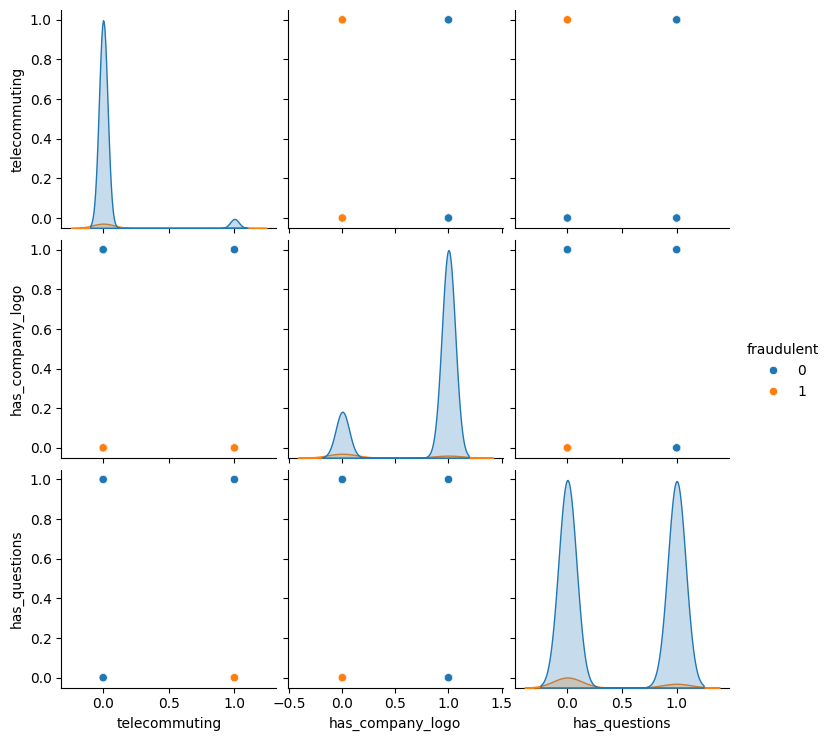

In [ ]:
sns.pairplot(job,hue="fraudulent")
plt.show()

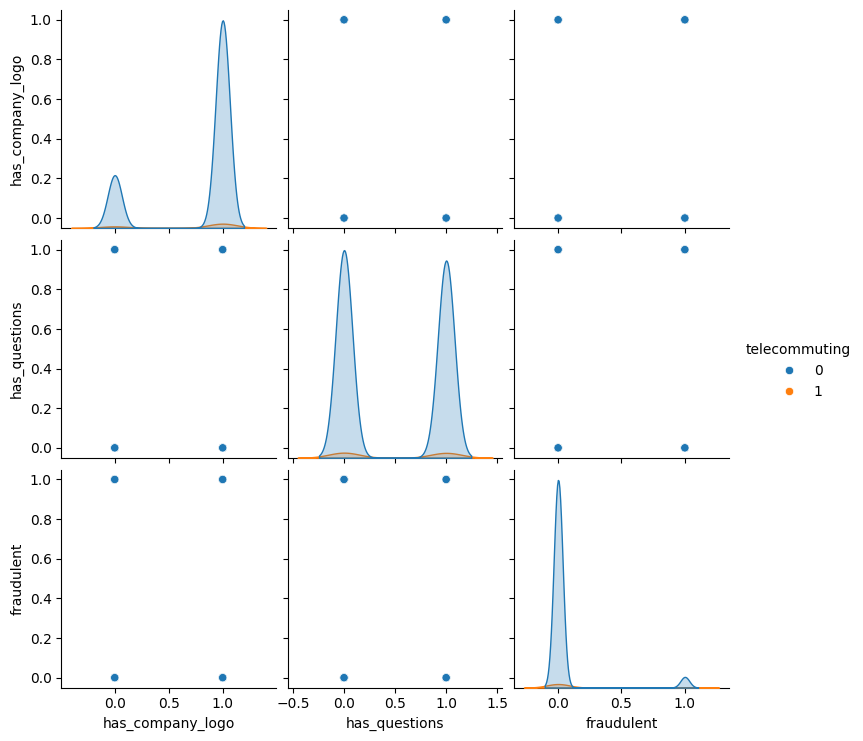

In [ ]:
sns.pairplot(job,hue="telecommuting")
plt.show()

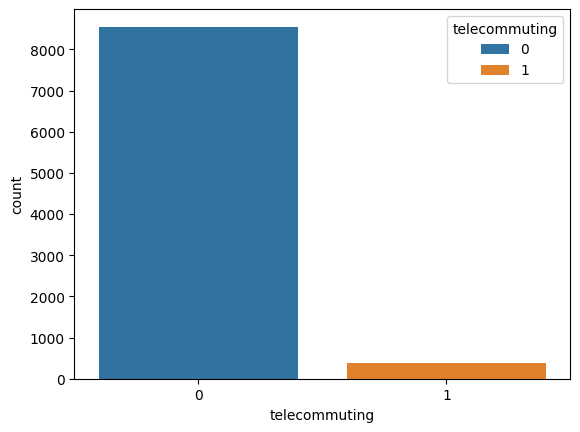

In [ ]:
sns.countplot(x=job.telecommuting,hue=job.telecommuting,fill=True)
plt.show()

In [ ]:
# Separate features and target variable
X = job[['title', 'location', 'description', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions']]
y = job['fraudulent']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
# Preprocess text features using TF-IDF
text_features = ['title', 'location', 'description', 'requirements']
text_transformer = TfidfVectorizer(max_features=5000)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# Combine all text features into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('title_tfidf', text_transformer, 'title'),
        ('location_tfidf', text_transformer, 'location'),
        ('description_tfidf', text_transformer, 'description'),
        ('requirements_tfidf', text_transformer, 'requirements'),
        ('scaler', StandardScaler(), ['telecommuting', 'has_company_logo', 'has_questions'])
    ])

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,title,location,description,requirements,telecommuting,has_company_logo,has_questions
3532,"Sr. Manager, Global Solutions Architects","US, CA, Redwood City",THE COMPANY: EQUINIX [NASDAQ:EQIX]Equinix is t...,EDUCATION: BS or MS in engineering or related ...,0,1,0
7110,Lead Consultant -OBIEE,"US, CA, San Jose, SFO, Austin, OH",Role: Lead Consultant -OBIEELocation: San Jos...,Job Description :PreferredAt least 5 years of ...,0,0,1
3844,Real Estate Agents,"US, CA, Studio City",Dilbeck Real Estate is family-owned Real Estat...,University degree required. TEFL / TESOL / CEL...,0,1,0
4794,Sales Development Representative,"US, OH, Cincinnati","About the jobInfotrust is a fast-growing, prof...",RequirementsA commanding desire to learn and s...,0,1,0
476,Quality Assurance Engineer,"US, MI, Detroit",(We have more than 1500+ Job openings in our w...,University degree required. TEFL / TESOL / CEL...,0,0,0
...,...,...,...,...,...,...,...
5734,Cold Calling - Part-Time,"US, OH, Columbus","Ron Christopher Co., Inc. (RCC) is a Mergers a...",Primary requirements sought in a candidate inc...,1,0,1
5191,Customer Service Representatives,"US, SC, Col",First Shift Monday – Friday Customer Service R...,"High School Diploma, 5 years or more of custom...",0,0,0
5390,Head of Customer Success,"IL, ,",SimilarWeb is a global leader in providing dig...,Skills and Requirements5 years’ experience in ...,0,1,0
860,Fuel Oil Delivery Drivers,"US, DE, Wilmington","Burns &amp; McBride, a leader in the heating o...",Preferred candidates must have a valid class A...,0,1,0


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7152, 7)
(1788, 7)
(7152,)
(1788,)


In [ ]:
# Create a pipeline with preprocessing and a classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [ ]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('title_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  'title'),
                                                 ('location_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  'location'),
                                                 ('description_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  'description'),
                                                 ('requirements_tfidf',
                                                  TfidfVectorizer(max_features=5000),
                                                  'requirements'),
                                                 ('scaler', StandardScaler(),
                                                  ['telecommuting',
                                                   'has_company_logo',
                                                   'has_questions'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9675615212527964,
 array([[1694,    0],
        [  58,   36]]),
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.98      1694\n           1       1.00      0.38      0.55        94\n\n    accuracy                           0.97      1788\n   macro avg       0.98      0.69      0.77      1788\nweighted avg       0.97      0.97      0.96      1788\n')

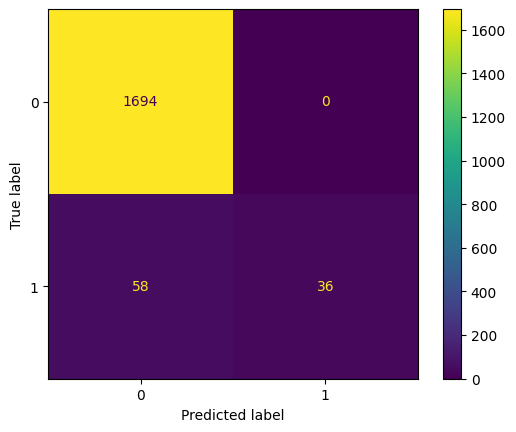

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot()
plt.show()